# Examples

In [16]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [17]:
from pde import laplace
from pde import parabolic
from pde import wave

In [18]:
def surface(u, x, y):
    """3d surface plot."""
    fig = plt.figure()
    ax  = fig.gca(projection='3d')

    y_mesh, x_mesh = np.meshgrid(y, x)

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('u')
    ax.plot_trisurf(x_mesh.flatten(), y_mesh.flatten(), u.flatten(),
                    cmap=cm.jet, linewidth=0.2)

    plt.show()

## Laplace's equation

u_xx + u_yy = 0

<IPython.core.display.Javascript object>


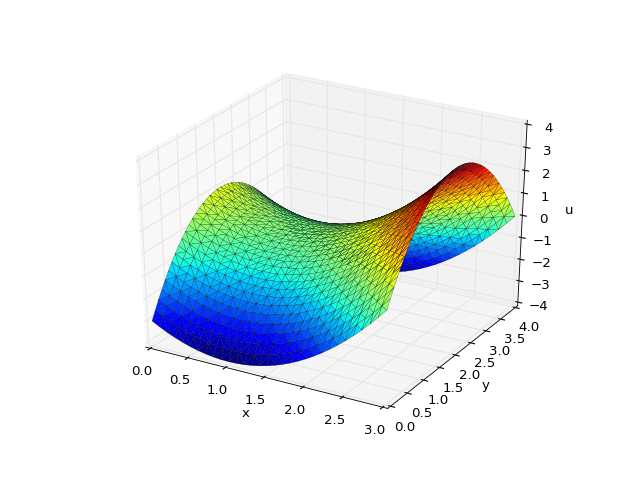

In [24]:
xn = 30
xf = 3.
yn = 40
yf = 4.

x = np.linspace(0, xf, xn+1)
y = np.linspace(0, yf, yn+1)

f = lambda x, y: (x-1)**2 - (y-2)**2
bound_x0 = f(0, y)
bound_xf = f(xf, y)
bound_y0 = f(x, 0)
bound_yf = f(x, yf)

domain = (xn, xf, yn, yf)
conds  = (bound_x0, bound_xf, bound_y0, bound_yf)

surface(laplace.solve(domain, conds, method='ic'), x, y)

## Parabolic equation

u_y = p\*u_xx + q\*u_x + r\*u + s

<IPython.core.display.Javascript object>


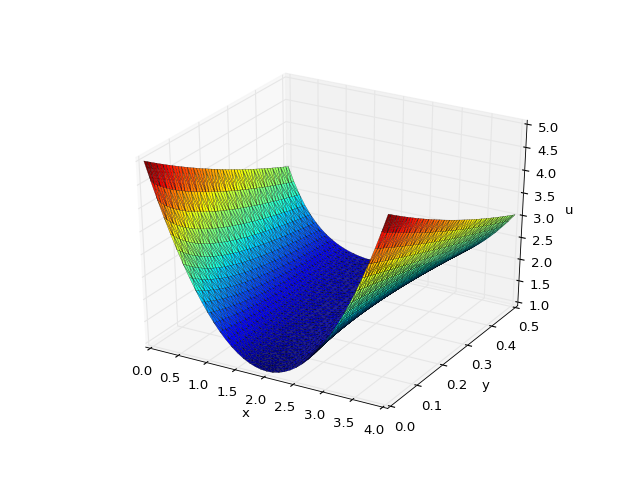

In [25]:
xn = 40
xf = 4.
yn = 50
yf = 0.5

x = np.linspace(0, xf, xn+1)
y = np.linspace(0, yf, yn+1)

init   = (lambda x: x**2 - 4*x + 5)(x)
bound1 = (lambda y: 5 * np.exp(-y))(y)
bound2 = (lambda y: 5 * np.exp(-y))(y)

p = 1
q = 1
r = -3
s = 3

domain = (xn, xf, yn, yf)
conds  = (init, bound1, bound2)
params = (p, q, r, s)

surface(parabolic.solve(domain, params, conds, method='iu'), x, y)

## Wave equation

u_yy = u_xx

<IPython.core.display.Javascript object>


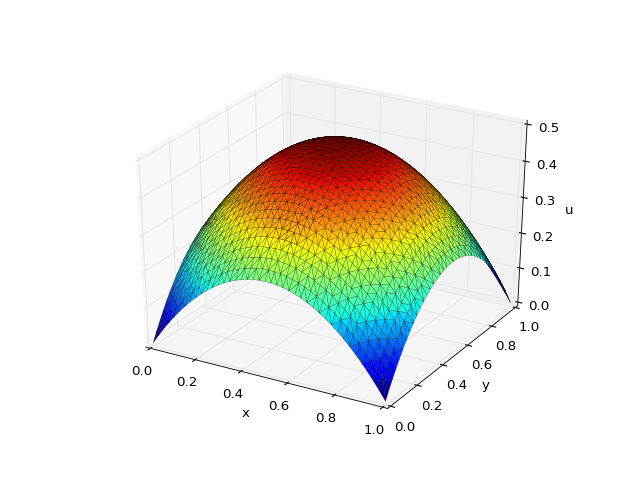

In [28]:
xn = 40
xf = 1.
yn = 40
yf = 1.

x = np.linspace(0, xf, xn+1)
y = np.linspace(0, yf, yn+1)

d_init = 1
init   = (lambda x: x * (1-x))(x)
bound1 = (lambda y: y * (1-y))(y)
bound2 = (lambda y: y * (1-y))(y)

domain = (xn, xf, yn, yf)
conds  = (d_init, init, bound1, bound2)

surface(wave.solve(domain, conds, method='i'), x, y)